<a href="https://colab.research.google.com/github/luisrayas2000/Data-Analysis/blob/main/First_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step one: Cleaning and loading

In [1]:
import pandas as pd
import os


In [2]:
df_Air_Traffic_Passenger_Statistics = pd.read_csv('/content/Air_Traffic_Passenger_Statistics.csv')

In [3]:
df_Air_Traffic_Passenger_Statistics.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [4]:
len(df_Air_Traffic_Passenger_Statistics)

26156

In [5]:
df_A_T_P_S = df_Air_Traffic_Passenger_Statistics.dropna(how='any')

In [6]:
len(df_A_T_P_S)

26025

In [7]:
df_A_T_P_S.dtypes

Activity Period                 int64
Operating Airline              object
Operating Airline IATA Code    object
Published Airline              object
Published Airline IATA Code    object
GEO Summary                    object
GEO Region                     object
Activity Type Code             object
Price Category Code            object
Terminal                       object
Boarding Area                  object
Passenger Count                 int64
dtype: object

## Step two: exploration

In [8]:
%matplotlib inline
import pandas as pd


In [9]:
df_A_T_P_S.columns

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count'],
      dtype='object')

In [10]:
df_A_T_P_S.describe()

,Activity Period,Passenger Count
count,26025.000000,26025.000000
mean,201415.590509,28613.751431
std,510.103915,60144.923058
min,200507.000000,1.000000
25%,201002.000000,4615.000000
50%,201412.000000,8701.000000
75%,201811.000000,19587.000000
max,202303.000000,659837.000000


In [11]:
df_A_T_P_S['GEO Region'].value_counts()[0:10]

US                     9109
Asia                   5513
Europe                 4265
Canada                 2415
Mexico                 1993
Australia / Oceania    1404
Central America         628
Middle East             607
South America            91
Name: GEO Region, dtype: int64

In [12]:
df_A_T_P_S['Operating Airline'].value_counts()[0:10]

United Airlines                     3050
United Airlines - Pre 07/01/2013    2154
SkyWest Airlines                    1736
Alaska Airlines                     1119
Delta Air Lines                      614
American Airlines                    540
Southwest Airlines                   536
Air Canada                           530
JetBlue Airways                      521
Virgin America                       462
Name: Operating Airline, dtype: int64

In [13]:
df_A_T_P_S['Published Airline'].value_counts()[0:10]

United Airlines                     3617
United Airlines - Pre 07/01/2013    2645
Alaska Airlines                     1669
Delta Air Lines                     1277
American Airlines                    900
Air Canada                           690
Southwest Airlines                   536
JetBlue Airways                      521
Virgin America                       462
Frontier Airlines                    430
Name: Published Airline, dtype: int64

<Axes: >

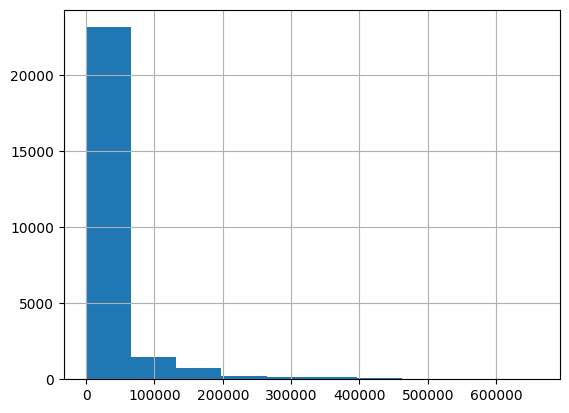

In [14]:
df_A_T_P_S['Passenger Count'].hist()

<Axes: >

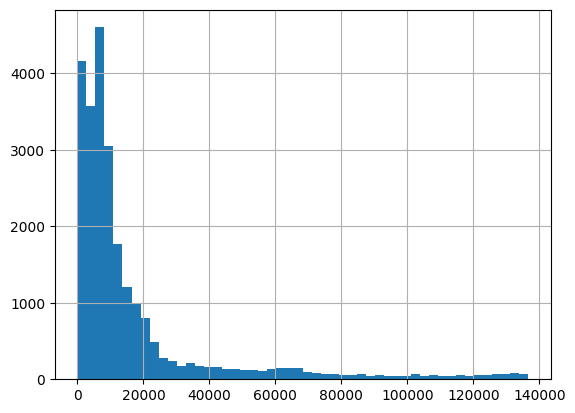

In [15]:
df_A_T_P_S[df_A_T_P_S['Passenger Count']< df_A_T_P_S['Passenger Count'].quantile(0.95)]['Passenger Count'].hist(bins = 50)

In [16]:
df_A_T_P_S[df_A_T_P_S['Passenger Count']< df_A_T_P_S['Passenger Count'].quantile(0.95)]['Passenger Count'].head()

0    27271
1    29131
2     5415
3    35156
4    34090
Name: Passenger Count, dtype: int64

In [17]:
Total_passengers = df_A_T_P_S.groupby('Operating Airline').sum()['Passenger Count']
Total_passengers

<ipython-input-17-86b61af18cf8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Total_passengers = df_A_T_P_S.groupby('Operating Airline').sum()['Passenger Count']


Operating Airline
ABC Aerolineas S.A. de C.V. dba Interjet     195379
ATA Airlines                                 384764
Aer Lingus, Ltd.                            1259943
Aeromexico                                  2854230
Air Berlin                                   235155
                                             ...   
WOW Air                                      359809
WestJet Airlines                            1193085
World Airways                                   785
XL Airways France                            160513
Xtra Airways                                    146
Name: Passenger Count, Length: 92, dtype: int64

In [18]:
Total_passengers.reset_index()

,Operating Airline,Passenger Count
0,ABC Aerolineas S.A. de C.V. dba Interjet,195379
1,ATA Airlines,384764
2,"Aer Lingus, Ltd.",1259943
3,Aeromexico,2854230
4,Air Berlin,235155
...,...,...
87,WOW Air,359809
88,WestJet Airlines,1193085
89,World Airways,785
90,XL Airways France,160513


<Axes: xlabel='Operating Airline'>

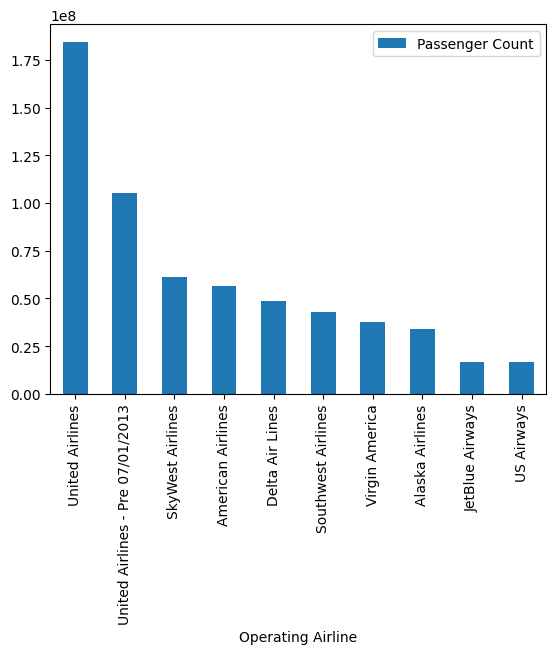

In [19]:
Total_passengers.reset_index().sort_values(by='Passenger Count',ascending=False).iloc[0:10].plot(kind='bar', x='Operating Airline', y='Passenger Count')

<ipython-input-20-6fa43e3fdea4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_A_T_P_S.groupby(['Operating Airline','GEO Region']).sum()['Passenger Count'].sort_values(ascending=False).iloc[0:10].plot(kind='bar', x='Operating Airline', y='Passenger Count')


<Axes: xlabel='Operating Airline,GEO Region'>

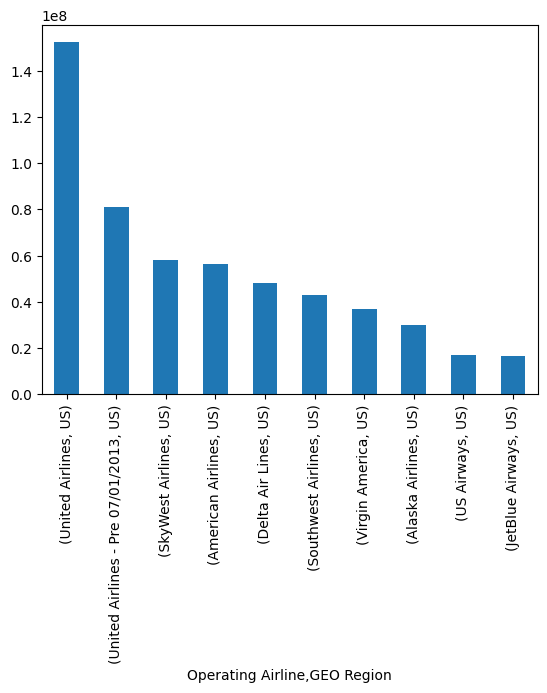

In [20]:
df_A_T_P_S.groupby(['Operating Airline','GEO Region']).sum()['Passenger Count'].sort_values(ascending=False).iloc[0:10].plot(kind='bar', x='Operating Airline', y='Passenger Count')

## Text analisis

In [21]:
import nltk
nltk.download('book')
from nltk.book import *
from nltk.corpus import stopwords

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [22]:
text_Geo_region = ''
for row in df_A_T_P_S['GEO Region']:
  text_Geo_region= text_Geo_region + ' ' +row

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


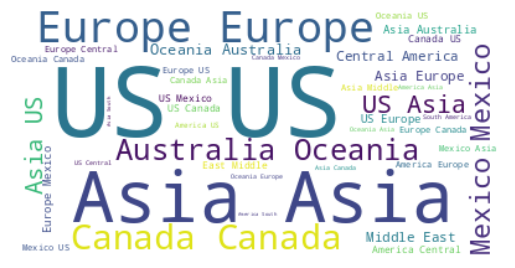

In [24]:
wc = WordCloud(background_color='white')
wc.generate(text_Geo_region)
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()

##Data

In [25]:
df_A_T_P_S.dtypes

Activity Period                 int64
Operating Airline              object
Operating Airline IATA Code    object
Published Airline              object
Published Airline IATA Code    object
GEO Summary                    object
GEO Region                     object
Activity Type Code             object
Price Category Code            object
Terminal                       object
Boarding Area                  object
Passenger Count                 int64
dtype: object

In [26]:
passenger_sales = df_A_T_P_S['Operating Airline'].value_counts().to_dict()

In [27]:
list(passenger_sales.keys())[0:5]

['United Airlines',
 'United Airlines - Pre 07/01/2013',
 'SkyWest Airlines',
 'Alaska Airlines',
 'Delta Air Lines']

In [28]:
df_A_T_P_S['passenger_sales'] = df_A_T_P_S['Operating Airline'].apply(lambda x: passenger_sales[x])

<ipython-input-28-67af4dedf2ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_A_T_P_S['passenger_sales'] = df_A_T_P_S['Operating Airline'].apply(lambda x: passenger_sales[x])


## Machine learning

In [29]:
data = df_A_T_P_S.copy()
for i, column in enumerate(list([str(d) for d in data.dtypes])):
  if column == "object":
    data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].mode())
    data[data.columns[i]] = data[data.columns[i]].astype("category").cat.codes
  else:
    data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].median())

In [30]:
data.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,passenger_sales
0,200507,1,73,1,67,0,8,0,0,2,1,27271,44
1,200507,1,73,1,67,0,8,1,0,2,1,29131,44
2,200507,1,73,1,67,0,8,2,0,2,1,5415,44
3,200507,5,7,5,7,1,2,0,1,2,1,35156,530
4,200507,5,7,5,7,1,2,1,1,2,1,34090,530


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [33]:
y = data.pop('passenger_sales')
X = data.copy()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
clf = RandomForestRegressor(n_estimators=1000, max_depth=4)

In [36]:
clf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=1000)

In [37]:
from sklearn.metrics import r2_score

In [38]:
r2_score(y_test, clf.predict(X_test))

0.9725120106891566

In [40]:
import gensim
from nltk.corpus import stopwords
import numpy as np

np.random.seed(2021)

In [42]:
df_A_T_P_S['GEO Region']

0            US
1            US
2            US
3        Canada
4        Canada
          ...  
26151      Asia
26152    Europe
26153    Europe
26154    Canada
26155    Canada
Name: GEO Region, Length: 26025, dtype: object

In [43]:
from scipy.stats import norm

In [49]:
params = norm.fit(df_A_T_P_S['Passenger Count'])
params

60143.76752532523

In [50]:
df_A_T_P_S['Prob_total'] = [norm(params[0], params[1]).cdf(x) for x in df_A_T_P_S['Passenger Count']]

<ipython-input-50-82b17b9ffa16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_A_T_P_S['Prob_total'] = [norm(params[0], params[1]).cdf(x) for x in df_A_T_P_S['Passenger Count']]


<Axes: >

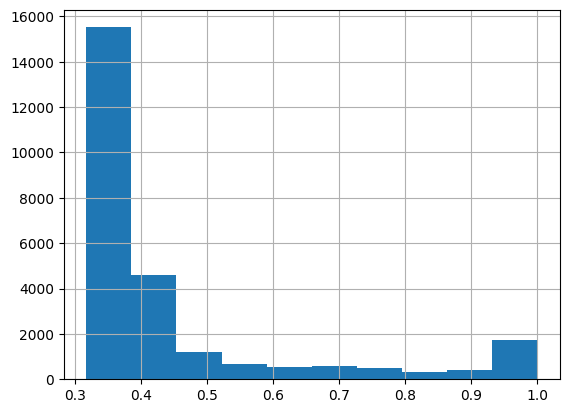

In [51]:
df_A_T_P_S['Prob_total'].hist()

In [53]:
df_A_T_P_S[df_A_T_P_S['Prob_total']>0.95]

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,passenger_sales,Prob_total
23,200507,American Airlines,AA,American Airlines,AA,Domestic,US,Deplaned,Other,Terminal 3,E,166577,540,0.989102
24,200507,American Airlines,AA,American Airlines,AA,Domestic,US,Enplaned,Other,Terminal 3,E,160890,540,0.986073
93,200507,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,Domestic,US,Deplaned,Other,Terminal 3,F,443656,2154,1.000000
94,200507,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,Domestic,US,Enplaned,Other,Terminal 3,F,421802,2154,1.000000
138,200508,American Airlines,AA,American Airlines,AA,Domestic,US,Deplaned,Other,Terminal 3,E,162064,540,0.986752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26055,202303,Delta Air Lines,DL,Delta Air Lines,DL,Domestic,US,Enplaned,Other,Terminal 1,C,147733,614,0.976181
26122,202303,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Other,Terminal 3,E,198070,3050,0.997580
26123,202303,United Airlines,UA,United Airlines,UA,Domestic,US,Enplaned,Other,Terminal 3,E,193370,3050,0.996922
26125,202303,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Other,Terminal 3,F,383109,3050,1.000000
